<a href="https://colab.research.google.com/github/shubham19999/Fashion_detection/blob/master/Fashion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Apr 16 05:36:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git


Cloning into 'keras-retinanet'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 5699 (delta 24), reused 36 (delta 15), pack-reused 5620
Receiving objects: 100% (5699/5699), 14.07 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (3794/3794), done.


In [ ]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [ ]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170876 sha256=a59c35dfc84f6321e917a72052d935c3c9dedc1d926f50feba665e9665ef8422
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=e5319d9fb7d9430c535df6af103ee0bb87fff7c514efb07e55228aa8a65af53c
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 26kB/s 
     |████████████████████████████████| 450kB 41.7MB/s 
     |████████████████████████████████| 3.9MB 50.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=80f788b05b51cf5d640e912681b6e877986e6380a3fa3960fecb51f17d46652e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown --id 1aZLMp48LII1okZheA9bMKSY2nrSBHc4F --output E-commerce-clothing.json 

Downloading...
From: https://drive.google.com/uc?id=1aZLMp48LII1okZheA9bMKSY2nrSBHc4F
To: /content/keras-retinanet/E-commerce-clothing.json
100% 199k/199k [00:00<00:00, 75.3MB/s]


In [ ]:
os.makedirs("snapshots", exist_ok=True)

In [ ]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: /content/keras-retinanet/snapshots/resnet50_csv_10.h5
249MB [00:01, 156MB/s]


In [ ]:
clothes_df = pd.read_json('E-commerce-clothing.json', lines=True)

In [ ]:
os.makedirs("clothes", exist_ok=True)

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Tops'], 'notes': '', 'points': [{...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Jackets'], 'notes': '', 'points':...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Jackets'], 'notes': '', 'points':...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Tshirts'], 'notes': '', 'points':...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['Jackets'], 'notes': '', 'points':...",NaN


In [ ]:
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()

counter = 0
for index, row in clothes_df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save(f'clothes/cloth{counter}.jpeg', "JPEG")
    
    dataset["image_name"].append(f'clothes/cloth{counter}.jpeg')
    
    data = row["annotation"]
    data1 = data[0]["label"]
  
    width = data[0]["imageWidth"]
    height = data[0]["imageHeight"]

    dataset["x_min"].append(int(round(data[0]["points"][0]["x"] * width)))
    dataset["y_min"].append(int(round(data[0]["points"][0]["y"] * height)))
    dataset["x_max"].append(int(round(data[0]["points"][1]["x"] * width)))
    dataset["y_max"].append(int(round(data[0]["points"][1]["y"] * height)))
    dataset["class_name"].append((data1[0]))
    
    counter += 1
print("Downloaded {} cloth images.".format(counter))

Downloaded 504 cloth images.


In [ ]:
df = pd.DataFrame(dataset)
df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,clothes/cloth0.jpeg,3,79,146,253,Tops
1,clothes/cloth1.jpeg,11,64,114,205,Jackets
2,clothes/cloth2.jpeg,1,69,166,269,Jackets
3,clothes/cloth3.jpeg,3,85,166,305,Tshirts
4,clothes/cloth4.jpeg,2,68,177,281,Jackets


In [ ]:
df.iloc[251]

image_name    clothes/cloth251.jpeg
x_min                             0
y_min                           193
x_max                             7
y_max                           193
class_name                  Jackets
Name: 251, dtype: object

In [ ]:
df = df.drop(df.index[251])

In [ ]:
def show_image_objects(image_row):

  img_path = image_row.image_name
  box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

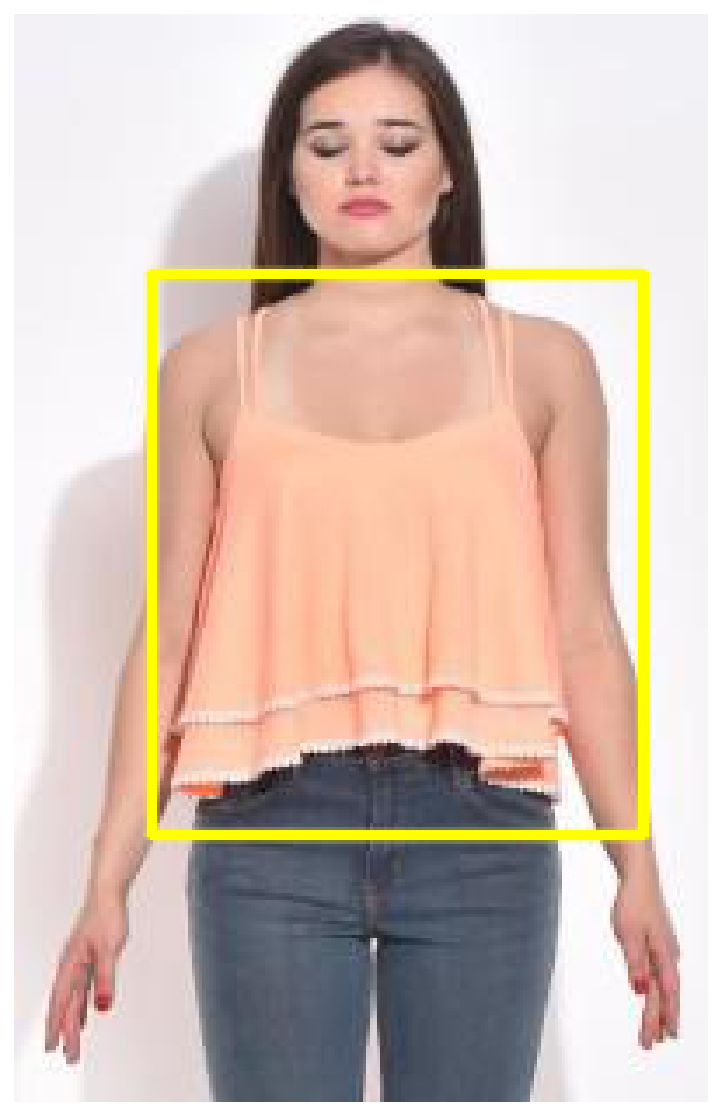

In [ ]:
show_image_objects(df.iloc[5])

In [ ]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [ ]:
train_df.iloc[34]

image_name    clothes/cloth57.jpeg
x_min                            5
y_min                           66
x_max                          129
y_max                          309
class_name                 Jackets
Name: 57, dtype: object

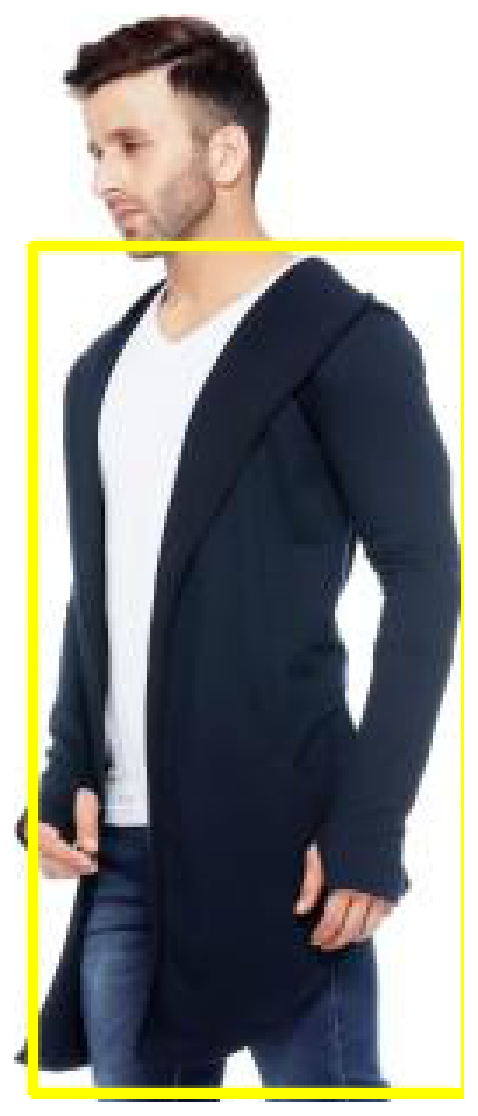

In [ ]:
show_image_objects(train_df.iloc[34])

In [ ]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [ ]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [ ]:
!head annotations.csv

clothes/cloth424.jpeg,42,22,173,283,Jeans
clothes/cloth19.jpeg,10,37,181,246,Skirts
clothes/cloth324.jpeg,8,74,140,273,Tshirts
clothes/cloth334.jpeg,30,6,175,200,Shirts
clothes/cloth56.jpeg,1,71,178,295,Tops
clothes/cloth234.jpeg,1,71,130,231,Tops
clothes/cloth315.jpeg,10,11,161,168,Tshirts
clothes/cloth333.jpeg,5,4,311,157,sunglasses
clothes/cloth132.jpeg,2,3,312,149,sunglasses
clothes/cloth137.jpeg,9,78,169,280,Shirts


In [ ]:
classes = set(['Jackets', 'Jeans', 'Shirts', 'Shoes', 'Skirts', 'sunglasses', 'Tops', 'Trousers', 'Tshirts'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [ ]:
!head classes.csv

Jackets,0
Jeans,1
Shirts,2
Shoes,3
Skirts,4
Tops,5
Trousers,6
Tshirts,7
sunglasses,8


In [ ]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 15 --steps 400 --epochs 30 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-04-16 06:03:53.164682: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-16 06:03:53.164795: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-16 06:03:53.164814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Creating model, this may take a second...
2020-04-16 06:03:54.165898: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORC

In [ ]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_11.h5  resnet50_csv_22.h5
resnet50_csv_01.h5    resnet50_csv_12.h5  resnet50_csv_23.h5
resnet50_csv_02.h5    resnet50_csv_13.h5  resnet50_csv_24.h5
resnet50_csv_03.h5    resnet50_csv_14.h5  resnet50_csv_25.h5
resnet50_csv_04.h5    resnet50_csv_15.h5  resnet50_csv_26.h5
resnet50_csv_05.h5    resnet50_csv_16.h5  resnet50_csv_27.h5
resnet50_csv_06.h5    resnet50_csv_17.h5  resnet50_csv_28.h5
resnet50_csv_07.h5    resnet50_csv_18.h5  resnet50_csv_29.h5
resnet50_csv_08.h5    resnet50_csv_19.h5  resnet50_csv_30.h5
resnet50_csv_09.h5    resnet50_csv_20.h5
resnet50_csv_10.h5    resnet50_csv_21.h5


In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_30.h5


Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [ ]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [ ]:
THRES_SCORE = 0.5

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

In [ ]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)


  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

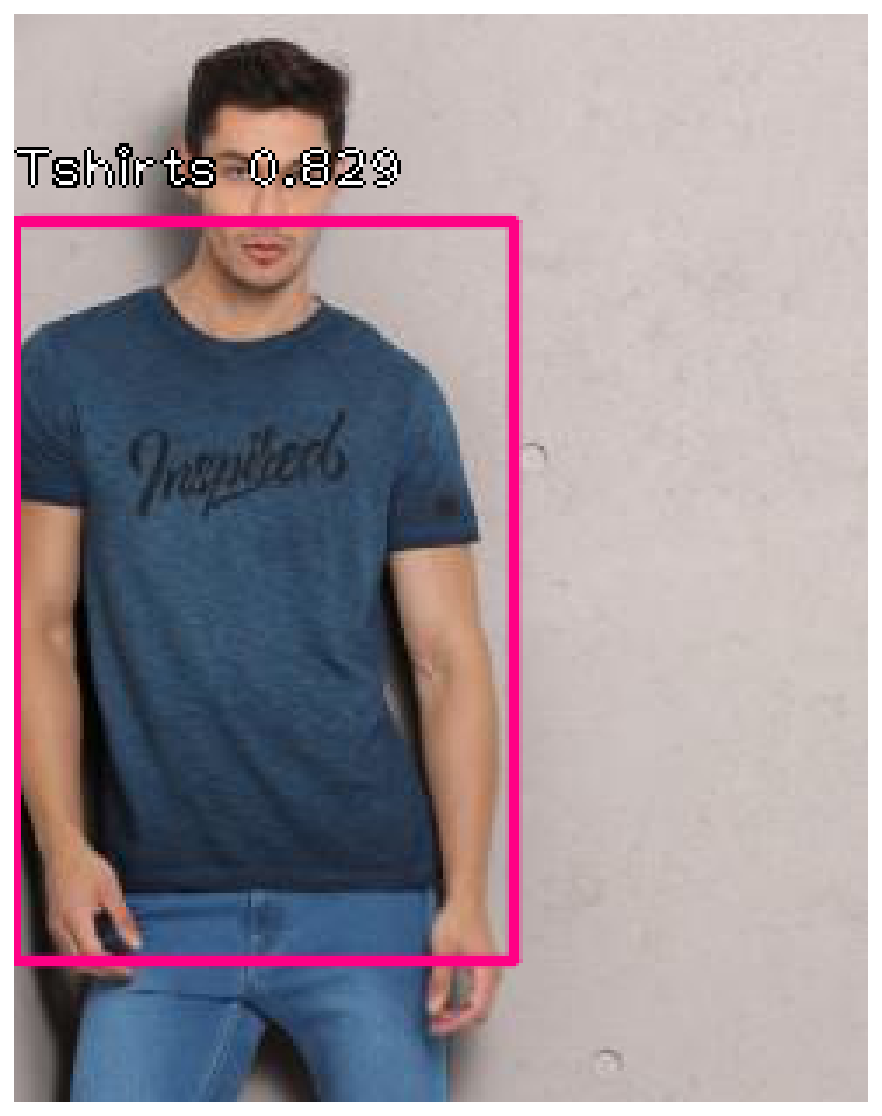

image_name    clothes/cloth155.jpeg
x_min                             4
y_min                            69
x_max                           146
y_max                           260
class_name                  Tshirts
Name: 155, dtype: object

In [ ]:
show_detected_objects(test_df.iloc[3])
test_df.iloc[3]

In [ ]:
import requests
from google.colab import files
from IPython.display import Image


img = files.upload()


Saving 4.jpg to 4.jpg


In [ ]:

datas = dict()
datas["image_name"] = list()
    
datas["image_name"].append(f'4.jpg')  

In [ ]:
d = pd.DataFrame(datas)

In [ ]:
d.iloc[0]

image_name    4.jpg
Name: 0, dtype: object

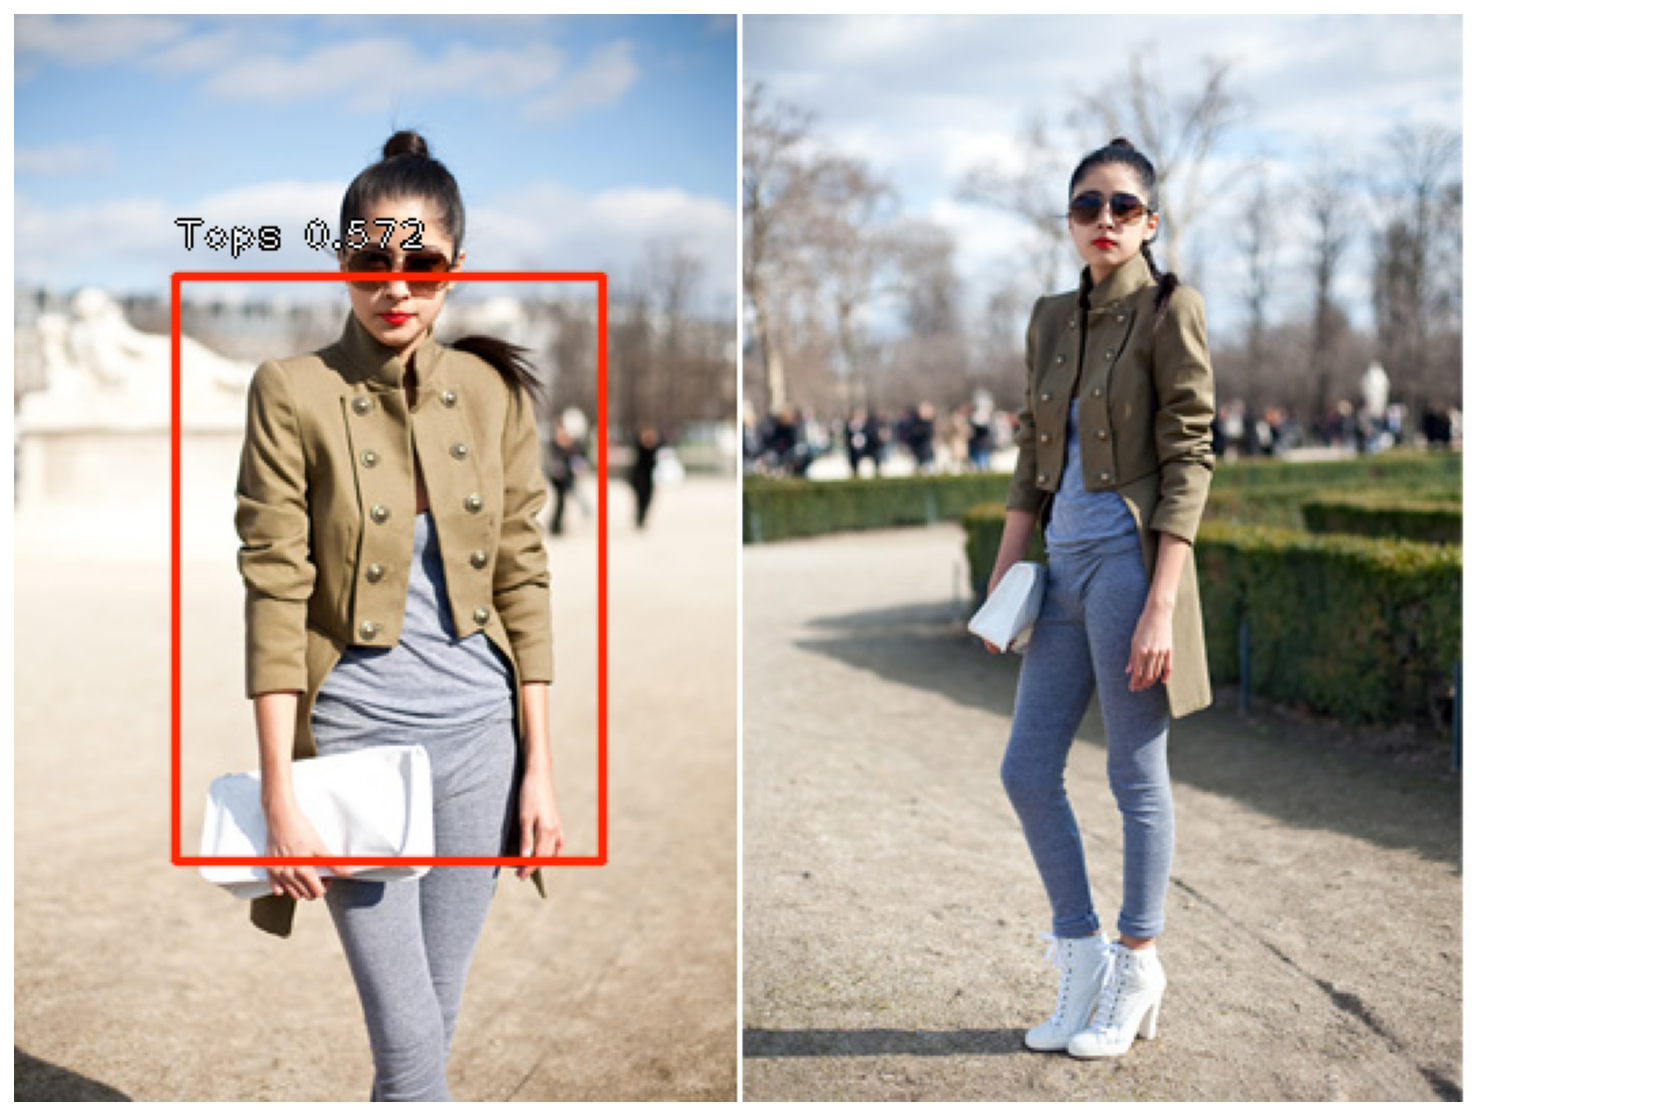

In [ ]:
show_detected_objects(d.iloc[0])
